In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

df = pd.read_excel("merc.xlsx") # read excel file and inset into DataFrame
df.head() # show header for the table

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [3]:
df.describe() # it describes the data

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [4]:
df.isnull().sum() # it shows which row how many null data

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 720x504 with 0 Axes>

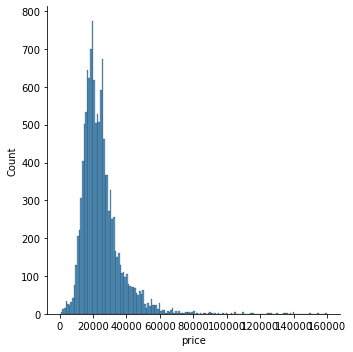

In [7]:
plt.figure(figsize = (10,7))
sbn.displot(df["price"]) # distribution plot.

/Users/onurerbey/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

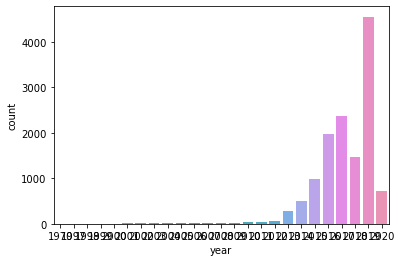

In [10]:
sbn.countplot(df["year"]) # it shows how many cars for each year

In [11]:
df.corr() # it shows correlation

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [12]:
df.sort_values("price",ascending = False).head(10) # sort the values based on price descending

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [14]:
# As it can be seen distruption plot some high price cars can mislead our predictios
# We'll use 99% of the data so we can get rid of misleading data/exceptions
len(df) * 0.01 # find 1 percent

131.19

In [15]:
# Remove 131 most expensive cars
ninetyNineDf = df.sort_values("price", ascending = False).iloc[131:] # index located. It will start after 131st by descending
ninetyNineDf.describe() # describe 99% data 

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Figure size 720x504 with 0 Axes>

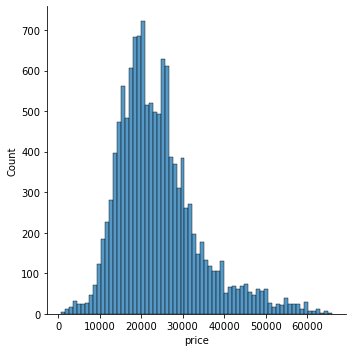

In [17]:
plt.figure(figsize = (10,7))
sbn.displot(ninetyNineDf["price"])

In [18]:
df.groupby("year").mean("price") # group by year and average price per year

,price,mileage,tax,mpg,engineSize
year,,,,,
1970,24999.000000,14000.000000,305.000000,39.200000,0.000000
1997,9995.000000,76000.000000,255.000000,28.200000,3.200000
1998,8605.000000,76347.750000,262.500000,28.925000,3.450000
1999,5995.000000,34000.000000,145.000000,24.600000,3.200000
2000,5743.333333,89648.666667,268.333333,26.333333,3.200000
2001,4957.900000,72955.100000,347.500000,28.140000,2.870000
2002,5820.444444,57391.111111,350.555556,27.877778,3.522222
2003,4878.000000,88777.714286,300.000000,29.485714,3.028571
2004,4727.615385,94363.461538,312.307692,31.838462,2.530769


In [19]:
df[df.year != 1970].groupby("year").mean("price") # remove 1970

# data frame = to new 99% data frame
df = ninetyNineDf 

# remove 1970 from data frame
df = df[df.year != 1970] # remove 1970 year

# remove transmission column. Alternative: It is possible turn data into numbers for regression test
df = df.drop("transmission", axis = 1) # removes transmission column

In [20]:
# Determine X and Y. Y is the values that we want to find
y = df["price"].values # get prices and make it numpy array
x = df.drop("price", axis = 1) # get all except from price

In [21]:
# Test split
from sklearn.model_selection import train_test_split
# set test size 30% and random is a random number for spliting method
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
len(x_train) # gives training data number

9090

In [23]:
len(x_test) # test number

3897

In [24]:
# Import scaler
from sklearn.preprocessing import MinMaxScaler
# set scaler
scaler = MinMaxScaler()
# set x train and x test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
# import tensorflow for model and layer creation
from tensorflow.keras.models import Sequential # creates model
from tensorflow.keras.layers import Dense # creates layers

x_train.shape # it shows number of data and layers (number of columns)
#(9090, 5)

# Create the model
model = Sequential()

# add hidden layers
model.add(Dense(12,activation = "relu")) # hidden layers 
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))

model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

In [28]:
# train the model
# validation process is done in the training. 
# Batch size set to prevent overload
# Epochs how many times the process will be done
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 250, epochs = 300)

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/37 [==========================>...] - ETA: 0s - loss: 676878336.0000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff69c627050> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the

Epoch 56/300
37/37 [==============================] - 0s 4ms/step - loss: 77916840.0000 - val_loss: 80063968.0000
Epoch 57/300
37/37 [==============================] - 0s 4ms/step - loss: 77614240.0000 - val_loss: 79780808.0000
Epoch 58/300
37/37 [==============================] - 0s 3ms/step - loss: 77315984.0000 - val_loss: 79504928.0000
Epoch 59/300
37/37 [==============================] - 0s 3ms/step - loss: 77018744.0000 - val_loss: 79207008.0000
Epoch 60/300
37/37 [==============================] - 0s 3ms/step - loss: 76711856.0000 - val_loss: 78922256.0000
Epoch 61/300
37/37 [==============================] - 0s 3ms/step - loss: 76409616.0000 - val_loss: 78635408.0000
Epoch 62/300
37/37 [==============================] - 0s 3ms/step - loss: 76104776.0000 - val_loss: 78352360.0000
Epoch 63/300
37/37 [==============================] - 0s 2ms/step - loss: 75807144.0000 - val_loss: 78057160.0000
Epoch 64/300
37/37 [==============================] - 0s 2ms/step - loss: 75502080.0000 

37/37 [==============================] - 0s 3ms/step - loss: 50823172.0000 - val_loss: 54368048.0000
Epoch 128/300
37/37 [==============================] - 0s 3ms/step - loss: 50258492.0000 - val_loss: 53838004.0000
Epoch 129/300
37/37 [==============================] - 0s 4ms/step - loss: 49695432.0000 - val_loss: 53297492.0000
Epoch 130/300
37/37 [==============================] - 0s 4ms/step - loss: 49110604.0000 - val_loss: 52748792.0000
Epoch 131/300
37/37 [==============================] - 0s 4ms/step - loss: 48536296.0000 - val_loss: 52193252.0000
Epoch 132/300
37/37 [==============================] - 0s 3ms/step - loss: 47975164.0000 - val_loss: 51636204.0000
Epoch 133/300
37/37 [==============================] - 0s 3ms/step - loss: 47370580.0000 - val_loss: 51067836.0000
Epoch 134/300
37/37 [==============================] - 0s 3ms/step - loss: 46771336.0000 - val_loss: 50495372.0000
Epoch 135/300
37/37 [==============================] - 0s 3ms/step - loss: 46188784.0000 - val

37/37 [==============================] - 0s 3ms/step - loss: 23292872.0000 - val_loss: 26611014.0000
Epoch 199/300
37/37 [==============================] - 0s 3ms/step - loss: 23127796.0000 - val_loss: 26428196.0000
Epoch 200/300
37/37 [==============================] - 0s 3ms/step - loss: 22972312.0000 - val_loss: 26287528.0000
Epoch 201/300
37/37 [==============================] - 0s 3ms/step - loss: 22810968.0000 - val_loss: 26063152.0000
Epoch 202/300
37/37 [==============================] - 0s 3ms/step - loss: 22678252.0000 - val_loss: 25924556.0000
Epoch 203/300
37/37 [==============================] - 0s 2ms/step - loss: 22539904.0000 - val_loss: 25753242.0000
Epoch 204/300
37/37 [==============================] - 0s 2ms/step - loss: 22420066.0000 - val_loss: 25679968.0000
Epoch 205/300
37/37 [==============================] - 0s 2ms/step - loss: 22281140.0000 - val_loss: 25484086.0000
Epoch 206/300
37/37 [==============================] - 0s 3ms/step - loss: 22177804.0000 - val

37/37 [==============================] - 0s 4ms/step - loss: 20224904.0000 - val_loss: 22657094.0000
Epoch 270/300
37/37 [==============================] - 0s 3ms/step - loss: 20209326.0000 - val_loss: 22605106.0000
Epoch 271/300
37/37 [==============================] - 0s 4ms/step - loss: 20193296.0000 - val_loss: 22687442.0000
Epoch 272/300
37/37 [==============================] - 0s 3ms/step - loss: 20184450.0000 - val_loss: 22562028.0000
Epoch 273/300
37/37 [==============================] - 0s 3ms/step - loss: 20170018.0000 - val_loss: 22535228.0000
Epoch 274/300
37/37 [==============================] - 0s 3ms/step - loss: 20143430.0000 - val_loss: 22677392.0000
Epoch 275/300
37/37 [==============================] - 0s 3ms/step - loss: 20143058.0000 - val_loss: 22538256.0000
Epoch 276/300
37/37 [==============================] - 0s 2ms/step - loss: 20149346.0000 - val_loss: 22696024.0000
Epoch 277/300
37/37 [==============================] - 0s 3ms/step - loss: 20095644.0000 - val

In [29]:
lossData = pd.DataFrame(model.history.history)
lossData.head() # shows loss data

,loss,val_loss
0,674383040.0,682895360.0
1,674372544.0,682878336.0
2,674338176.0,682814336.0
3,674222272.0,682620160.0
4,673909056.0,682134656.0


<AxesSubplot:>

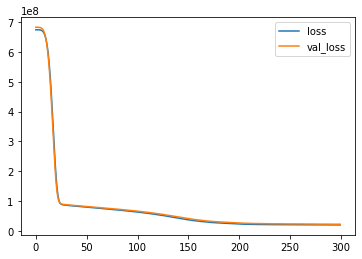

In [30]:
lossData.plot()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error
predictData = model.predict(x_test) # this gives prediced data
print(predictData) # it has determined prices. Those prices are with x data

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[24284.352]
 [21878.12 ]
 [15513.342]
 ...
 [19966.514]
 [33982.04 ]
 [24873.455]]


In [32]:
mean_absolute_error(y_test, predictData) # this is difference between real data and predicted data.
# our average price is 24074 and our estimation can be 3227 be different based on this results. 
# It's around 13% difference.
# We can go back and try to clean data, change test size, increase epochs, change neurons and hidden layers to get better results.
# When we make the changes, need to be creaful about overfitting.

3344.878814094275

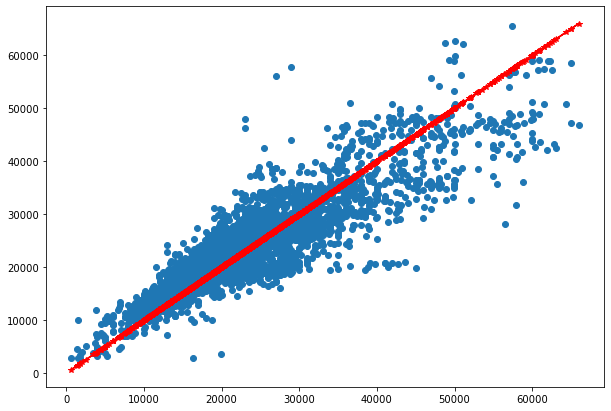

In [33]:
# plot the results 
# compares predicted data and test data
plt.figure(figsize = (10,7))
plt.scatter(y_test, predictData)
plt.plot(y_test,y_test,"r*-")

In [34]:
# we'll insert a new data by using existing one and see the prediction
print(df.iloc[2]) # bring second value results

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64


In [35]:
newCarSer = df.drop("price", axis = 1).iloc[2] # drop second car's price
type(newCarSer)
newCarSer = scaler.transform(newCarSer.values.reshape(-1,5)) # trasform new data. Reshape makes it 2D dimension
model.predict(newCarSer) # we added a new car value from our data set. it find 61187, the real price was 65980

array([[60300.793]], dtype=float32)